<a href="https://colab.research.google.com/github/sudo-KingJahad/finalterm-machine-learning/blob/main/Fish_Image_Detection_Robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disini, saya melatih model lagi demi mendapatkan hasil yang lebih bagus dan saya mendapatkannya, **BISA DI CEK DIBAGIAN AKHIR** untuk hasil prosesnya dan anda juga bisa melihat beberapa hasil deteksi yang merupakan model-2 dan untuk yang memiliki hasil yang **ROBUST** terdapat pada bagian akhir yang merupakan model-3

Anda dapat melihat di link Google Drive yang tertera di READNE.md

In [50]:
import os
import cv2
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Supress tensorflow log outputs

In [51]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

DATASET_PATH_TRAIN= "/content/drive/MyDrive/FishImg Dataset/train"  # ganti sesuai folder kamu
DATASET_PATH_VAL= "/content/drive/MyDrive/FishImg Dataset/val"  # ganti sesuai folder kamu
DATASET_PATH_TEST= "/content/drive/MyDrive/FishImg Dataset/test"  # ganti sesuai folder kamu

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH_TRAIN,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    DATASET_PATH_VAL,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 7055 images belonging to 31 classes.
Found 539 images belonging to 31 classes.


In [53]:
# CNN MODEL BUILDING
model = keras.Sequential([
    layers.Input((224, 224, 3)),

    layers.Conv2D(16, 3, activation="relu"),
    layers.BatchNormalization(), # Regularization
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2), # Regularization
    layers.Dense(31, activation="softmax"), # Changed from 9 to 31 classes
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 31)             │         2,015 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,795,263 (10.66 MB)

 Trainable params: 2,794,911 (10.66 MB)

 Non-trainable params: 352 (1.38 KB)

/content/drive/MyDrive/FishImg Dataset/test/Bangus/Bangus 152.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


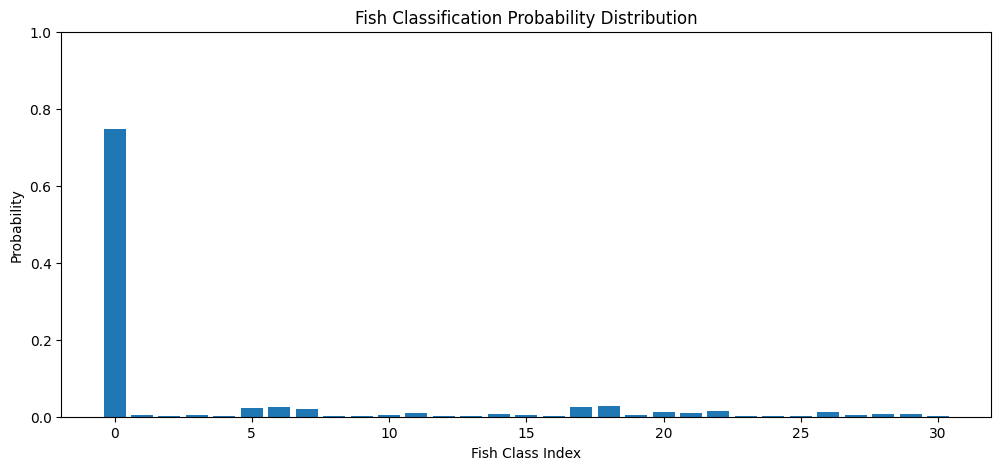

In [ ]:
import os

img_path = os.path.join(DATASET_PATH_TEST, "Bangus", os.listdir(os.path.join(DATASET_PATH_TEST, "Bangus"))[0])
print(img_path)

img = preprocess_image(img_path)
img = tf.expand_dims(img, axis=0)

preds = model.predict(img)[0]

plt.figure(figsize=(12,5))
plt.bar(range(len(preds)), preds)
plt.xlabel("Fish Class Index")
plt.ylabel("Probability")
plt.title("Fish Classification Probability Distribution")
plt.ylim(0,1)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 

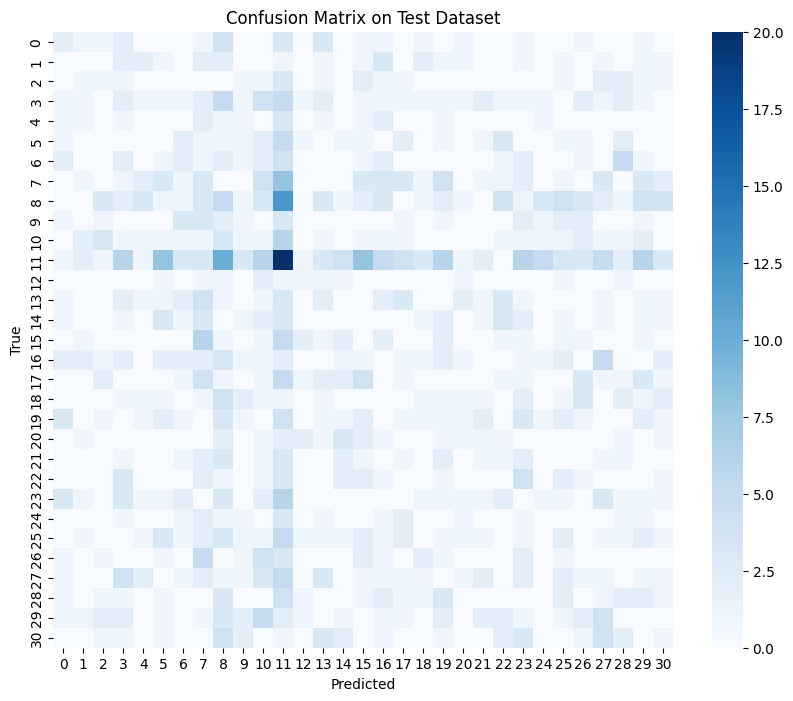

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_true = np.concatenate([
    np.argmax(y.numpy(), axis=1)
    for x, y in ds_test
])

y_pred = np.concatenate([
    np.argmax(model.predict(x), axis=1)
    for x, y in ds_test
])

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix on Test Dataset")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
labels = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


NameError: name 'train_generator' is not defined

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

NameError: name 'history' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,172,959 (42.62 MB)

 Trainable params: 11,172,959 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=EPOCHS,
    class_weight=class_weight_dict
)

NameError: name 'class_weight_dict' is not defined

In [ ]:
model.save('my_fish_model.keras')
print("Model saved to my_fish_model.keras")

Model saved to my_fish_model.keras


In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 532ms/step - accuracy: 0.4284 - loss: 1.9972
Validation Accuracy: 0.43


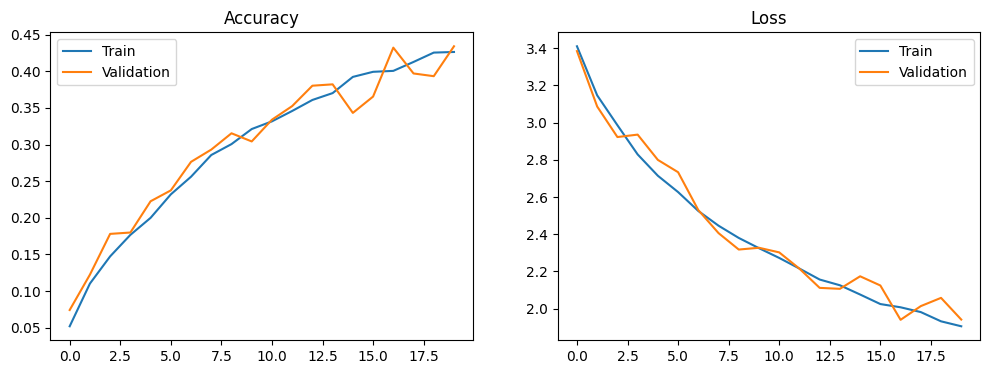

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


(np.float64(-0.5), np.float64(221.5), np.float64(221.5), np.float64(-0.5))

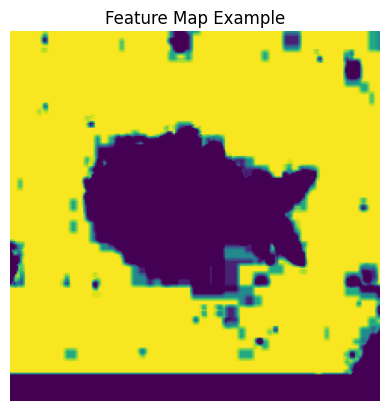

In [ ]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = tf.keras.Model(inputs=model.layers[0].input, outputs=layer_outputs)

img_batch, _ = next(val_generator)
activations = activation_model.predict(img_batch)

plt.imshow(activations[0][0,:,:,0], cmap='viridis')
plt.title("Feature Map Example")
plt.axis('off')

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

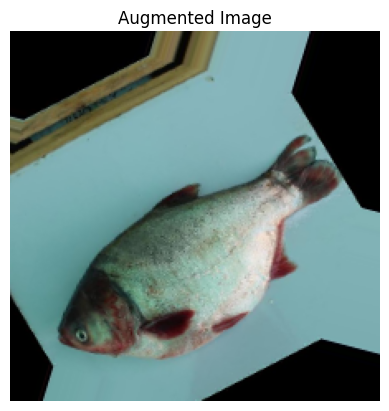

In [ ]:
img, label = next(train_generator)
plt.imshow(img[0])
plt.title("Augmented Image")
plt.axis('off')


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model_tl = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_tl.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

print(classification_report(y_true, y_pred))


17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 557ms/step
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        10
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       0.08      0.04      0.05        24
           8       0.06      0.05      0.06        37
           9       0.11      0.08      0.09        13
          10       0.00      0.00      0.00        19
          11       0.18      0.12      0.15        75
          12       0.17      0.17      0.17         6
          13       0.00      0.00      0.00        16
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        14
          16       0.05      0.06      

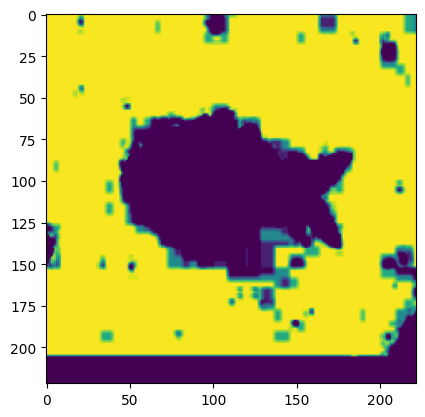

In [ ]:
plt.imshow(activations[0][0,:,:,0])

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/FishImg Dataset/my_fish_model_2.keras")

In [ ]:
# class_names = [
#     "Salmon",
#     "Tuna",
#     "Tilapia",
#     "Catfish",
#     "Goldfish"
# ]

class_names_map = train_generator.class_indices
class_names = [None] * train_generator.num_classes
for class_name, index in class_names_map.items():
    class_names[index] = class_name
print(f"Generated {len(class_names)} class names.")
print(f"First 5 class names: {class_names[:5]}")

Generated 31 class names.
First 5 class names: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


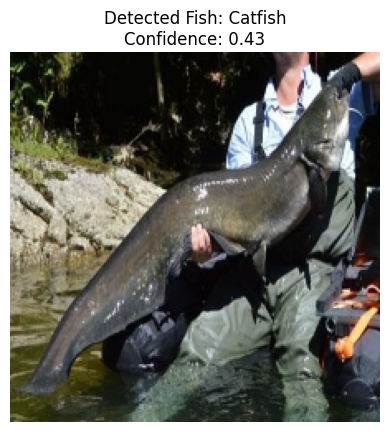

In [ ]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Catfish/05e2248b-dc0d-4c3d-b019-c0e8e649a788-0mm.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


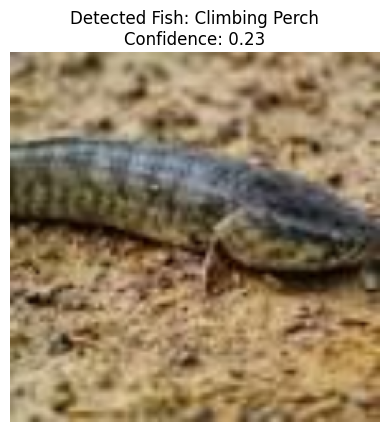

In [ ]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Snakehead/SnakeHead 01.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


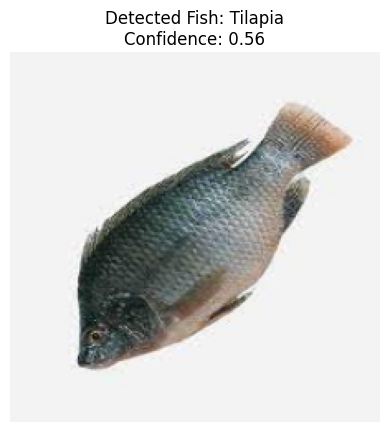

In [ ]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Tilapia/Picture101.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


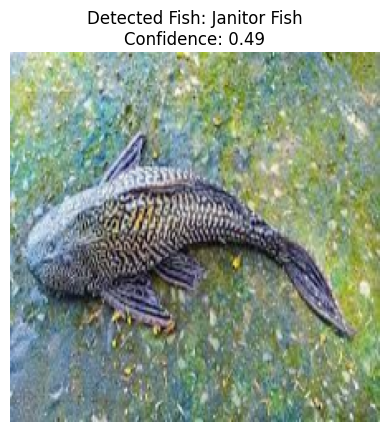

In [ ]:
detect_fish("/content/drive/MyDrive/FishImg Dataset/test/Janitor Fish/Picture453.jpg")

In [ ]:
def plot_fish_class_probability(img_path):
    img = preprocess_image(img_path)
    img_input = np.expand_dims(img, axis=0)

    predictions = model.predict(img_input)[0]

    plt.figure(figsize=(8,5))
    plt.bar(class_names, predictions)
    plt.xlabel("Fish Class")
    plt.ylabel("Probability")
    plt.title("Fish Classification Probability Comparison")
    plt.xticks(rotation=45)
    plt.ylim(0,1)
    plt.grid(axis='y')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


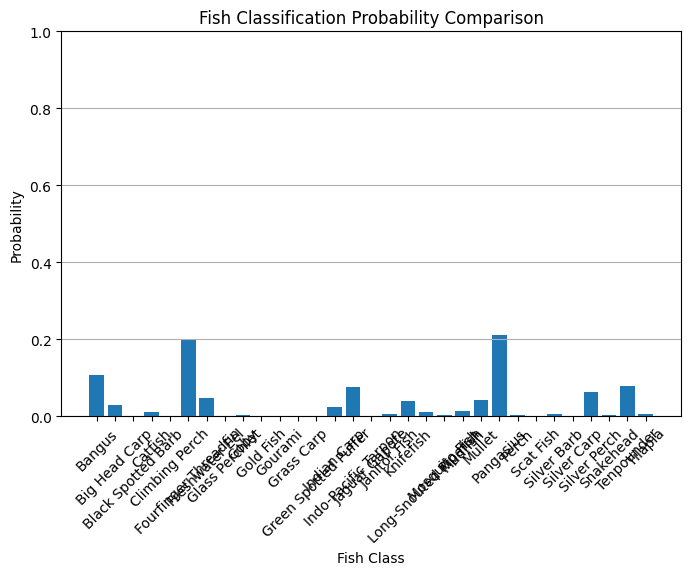

In [ ]:
plot_fish_class_probability("/content/drive/MyDrive/FishImg Dataset/test/Knifefish/1386140417_180.211.196.78.jpg")

In [ ]:
def compare_multiple_images(image_paths):
    confidences = []
    labels = []

    for path in image_paths:
        img = preprocess_image(path)
        img_input = np.expand_dims(img, axis=0)
        pred = model.predict(img_input)[0]
        confidences.append(np.max(pred))
        labels.append(os.path.basename(path))

    plt.figure(figsize=(8,4))
    plt.bar(labels, confidences)
    plt.xlabel("Test Image")
    plt.ylabel("Confidence")
    plt.title("Confidence Comparison on Fish Detection")
    plt.ylim(0,1)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

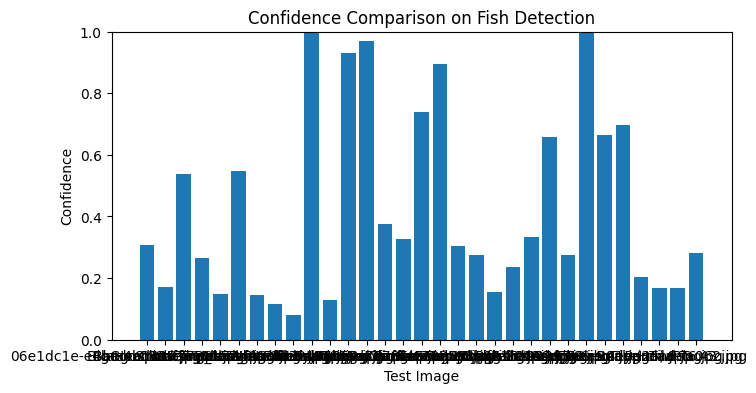

In [ ]:
compare_multiple_images([
    "/content/drive/MyDrive/FishImg Dataset/test/Bangus/Bangus 105.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Big Head Carp/Big Head Carp 101.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Black Spotted Barb/Black Spotted Barb 34.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Catfish/06e1dc1e-e4be-4b14-bf77-8d6aef4aeb13-1350mm.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Climbing Perch/Climbing perch 011.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Fourfinger Threadfin/Fourfinger Threadfin 9.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Freshwater Eel/Freshwater Eel 32.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Glass Perchlet/Glass Perchlet 40.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Goby/White Goby 35.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Gold Fish/Gold Fish 40.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Gourami/Gourami 64.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Grass Carp/CommonCarp_157_jpg.rf.edab7665d5678fde732553b0e15e9239.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Green Spotted Puffer/Green Spotted Puffer 31.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Indian Carp/Indian Carp 46.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Indo-Pacific Tarpon/Indo-Pacific Tarpon 38.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Jaguar Gapote/Jaguar Gapote 25.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Janitor Fish/Janitor Fish 31.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Knifefish/Clown Featherback 20.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Long-Snouted Pipefish/Long-Snouted Pipefish 34.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Mosquito Fish/Mosquito Fish 44.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Mudfish/Mudfish 015.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Mullet/Mullet 19.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Pangasius/Pangasius 18.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Perch/Perch 42.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Scat Fish/Scat Fish 30.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Silver Barb/Tawes 41.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Silver Carp/Silver-Body (25).JPG",
    "/content/drive/MyDrive/FishImg Dataset/test/Silver Perch/Silver Perch 6.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Snakehead/SnakeHead 76.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Tenpounder/Tenpounder 062.jpg",
    "/content/drive/MyDrive/FishImg Dataset/test/Tilapia/Tilapia 43.jpg"
])

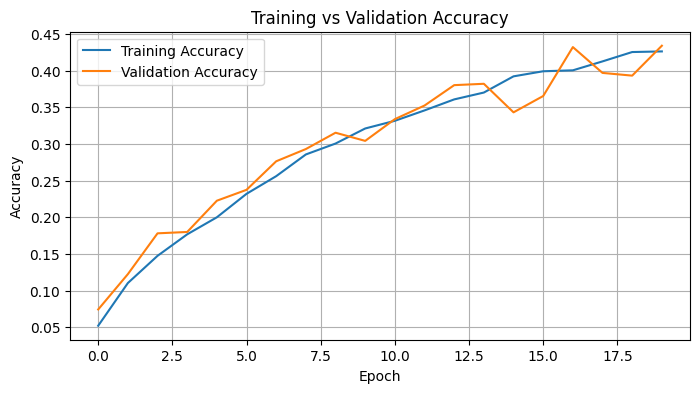

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

Melakukan percobaan kedua dengan Optimasisasi Program demi mendapatkan hasil training yang signifikan yang bisa dilihat pada model.fit dibawah ini

In [ ]:
# CREATING TRAINING AND VALIDATION DATASET
img_size = (224, 224)
batch_size = 32

ds_train = tf.keras.preprocessing.image_dataset_from_directory(DATASET_PATH_TRAIN,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(DATASET_PATH_VAL,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="validation",
)

Found 8819 files belonging to 31 classes.
Using 7056 files for training.
Found 2751 files belonging to 31 classes.
Using 550 files for validation.


In [ ]:
model.fit(ds_train, batch_size=64, epochs=5, verbose=2, validation_data=ds_validation)

Epoch 1/5
221/221 - 1670s - 8s/step - accuracy: 0.2543 - loss: 2.9008 - val_accuracy: 0.4055 - val_loss: 2.2998
Epoch 2/5
221/221 - 608s - 3s/step - accuracy: 0.4846 - loss: 1.9454 - val_accuracy: 0.6509 - val_loss: 1.5710
Epoch 3/5
221/221 - 631s - 3s/step - accuracy: 0.6818 - loss: 1.3192 - val_accuracy: 0.7891 - val_loss: 1.1250
Epoch 4/5
221/221 - 619s - 3s/step - accuracy: 0.8498 - loss: 0.8228 - val_accuracy: 0.8436 - val_loss: 0.8472
Epoch 5/5
221/221 - 618s - 3s/step - accuracy: 0.9351 - loss: 0.5228 - val_accuracy: 0.8600 - val_loss: 0.6964


In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"],
)

In [ ]:
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH_TEST,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=1,
    validation_split=0.6,
    subset="validation",
)

Found 1761 files belonging to 31 classes.
Using 1056 files for validation.


In [ ]:
model.evaluate(ds_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 211s 6s/step - accuracy: 0.8061 - loss: 0.9525


[0.8710097670555115, 0.8153409361839294]

In [ ]:
test_loss, test_acc = model.evaluate(ds_test, verbose=1)

print(f"Test Accuracy : {test_acc:.4f}")
print(f"Test Loss     : {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 939ms/step - accuracy: 0.8231 - loss: 0.8870
Test Accuracy : 0.8144
Test Loss     : 0.8725


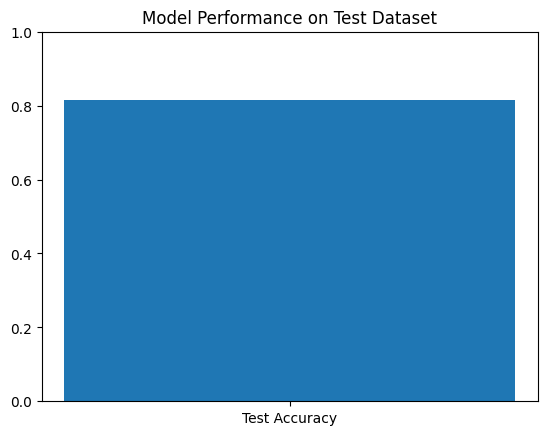

In [ ]:
import matplotlib.pyplot as plt

plt.bar(["Test Accuracy"], [test_acc])
plt.ylim(0,1)
plt.title("Model Performance on Test Dataset")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


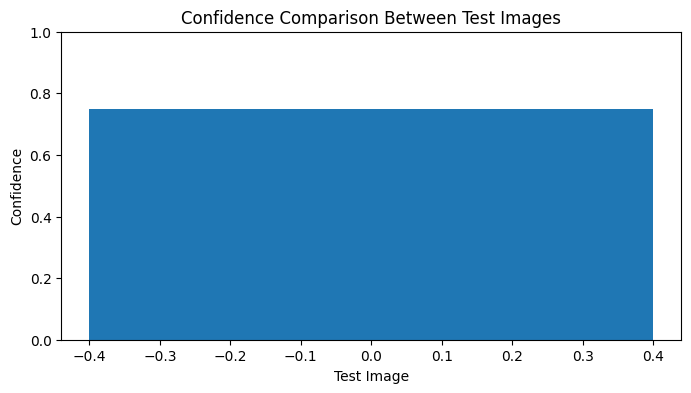

In [ ]:
import numpy as np

confidences = []

# Wrap img_path in a list if you intend to process the single image path
# or replace [img_path] with a list of actual image paths.
for path in [img_path]:
    img = preprocess_image(path)
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)[0]
    confidences.append(np.max(pred))

plt.figure(figsize=(8,4))
plt.bar(range(len(confidences)), confidences)
plt.xlabel("Test Image")
plt.ylabel("Confidence")
plt.title("Confidence Comparison Between Test Images")
plt.ylim(0,1)
plt.show()